# Lab 3.3: Continuous Distributions

## Outline

* Simulate and plot continuous distributions
* Calculate probabilities of events based on PDF and CDF
* Model data using continuous distributions

## Simulate and Plot

The Normal distribution is an important distribution for modeling in general. This is because a lot of pheonomena converge to the Normal distribution when the sample size is large. We will cover the convergence to
the Normal distribution later in the week.

### Example: Height of the California population

Say I want to model the height the California population. The mean height is 177.8 cm and the standard deviation is 10 cm. 

Here we will model the height with a normal distribution

Let $X$ be the height of the California population:

$X \sim Normal(177.8, 10^2)$

As usual, we import the necessary libraries in Python

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import yaml

from scipy import stats
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

- Here we define the distribution (Note that SciPy defines a Normal distribution with mean and standard deviation, instead of mean and variance)

In [3]:
height_normal_dist = stats.norm(177.8, 10)

- To see the spread of the data we sample 5000 points and plot a histogram of data

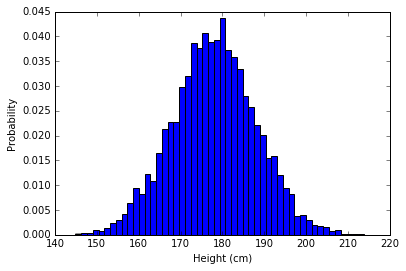

In [4]:
height_sample = height_normal_dist.rvs(5000)
hist(height_sample, bins=50, normed=True)
xlabel('Height (cm)')
ylabel('Probability');

### Lab Exercise 1: Battery Life Time

The life time of battery can be interpreted as the wait time before the occurrence of an event. Therefore we can model the phenomenon as an Exponential distribution

We know the mean life time of the battery is 72.4 hours. The mean of the exponential distribution is $\frac{1}{\lambda}$

Therefore, $\lambda =  \frac{1}{72.4}$

Let $Y$ be the life time of the battery:

$Y \sim Exponential(\frac{1}{72.4})$

1) Define the distribution in `scipy`. Note: `scipy` defines `scale` already as $\frac{1}{\lambda}$, so we don't need to inverse it here

2) Sample data from the distribution and visualize the spread

## Calculate probabilities of events based on PDF and CDF

### Example: Height of the California population

_Continuing our example above with the height of the California population:_

How can we find out the probability of a person having a height of 180cm? 

- In theory, the probability of having an exact value in a continuous variable is 0
- You can think of the probability of 180 as the probability of falling in the range of 180 $\pm \epsilon$ where $\epsilon$ is a infinitesimally small number  

In [5]:
# For example

height_normal_dist.cdf(180.001) - height_normal_dist.cdf(179.999)

7.7880751643610857e-05

Let's find the probability of being 140cm or shorter. To do this we use the CDF function.

In [6]:
height_normal_dist.cdf(140)

7.8414179383584631e-05

Finally, let's find out the probability of having a height of between 120cm and 140cm. To do that we compute the CDF of 120cm and 140cm and subtract the former from the latter

In [7]:
height_normal_dist.cdf(140) - height_normal_dist.cdf(120)

7.8410444352314387e-05

### Lab Exercise 2: Battery Life Time

_Continuing our example above with Battery Life Time_


1) What is the probability of having battery life more than 300 hours? 

2) What is the probability of having battery life between 50 and 100 hours? 

## Model data using continuous distributions

As we have done with discrete distributions, we can also model data with continuous distributions.

Here we have rainfall data for January for 140 years (`rainfall` in our RDS). We want to model the data with a continuous distribution. Which of the distributions below are appropriate.

<img src="images/choose_distribution.png" width="600px">

**Gamma** and **Normal** are appropriate candidates since they are continuous distributions.

- Let's read the data into a dataframe and select the January column

In [8]:
rainfall = pd.read_sql_table('rainfall', engine)
rainfall.head()

,Year,Jan
0,1871,2.76
1,1872,2.32
2,1873,2.96
3,1874,5.22
4,1875,6.15


In [9]:
jan_rainfall = rainfall.Jan

- Visualize the data in a histogram

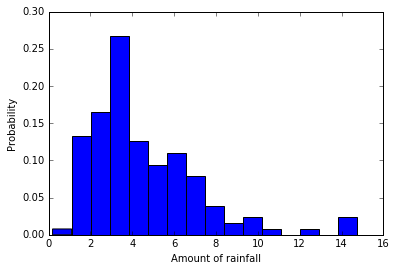

In [10]:
hist(jan_rainfall, bins=16, normed=True)
xlabel('Amount of rainfall')
ylabel('Probability');

- Fit a normal distribution 

In [11]:
norm_mean, norm_std = stats.norm.fit(jan_rainfall)
print(norm_mean, norm_std)

4.54457142857 2.62056656127


- Define the fitted distribution

In [12]:
fitted_norm = stats.norm(norm_mean, norm_std)
x = arange(16)
fitted_norm_y = fitted_norm.pdf(x)

- Plot fitted distribution over the original data

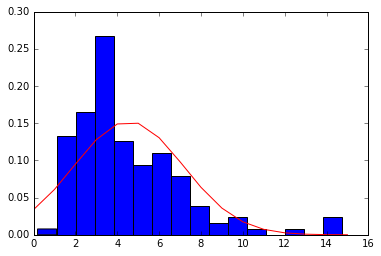

In [13]:
hist(jan_rainfall, bins=16, normed=True)
plot(x, fitted_norm_y, 'r');

### Lab Exercise 3: Fitting a Gamma Model

- Now let's try to fit a Gamma distribution to the data

- Define the fitted gamma distribution

- Plot fitted gamma over original data